In [43]:
# Heart Disease Detection Project
# Complete Code: EDA, Model Training, Saving .pkl, FastAPI Ready

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [44]:
# 2. Load Dataset
df = pd.read_csv('heart_disease_dataset.csv')  
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   sex                      400 non-null    int64  
 2   chest_pain_type          400 non-null    int64  
 3   resting_blood_pressure   400 non-null    int64  
 4   cholesterol              400 non-null    int64  
 5   fasting_blood_sugar      400 non-null    int64  
 6   resting_ecg              400 non-null    int64  
 7   max_heart_rate           400 non-null    int64  
 8   exercise_induced_angina  400 non-null    int64  
 9   st_depression            400 non-null    float64
 10  st_slope                 400 non-null    int64  
 11  num_major_vessels        400 non-null    int64  
 12  thalassemia              400 non-null    int64  
 13  heart_disease            400 non-null    int64  
dtypes: float64(1), int64(13)
m

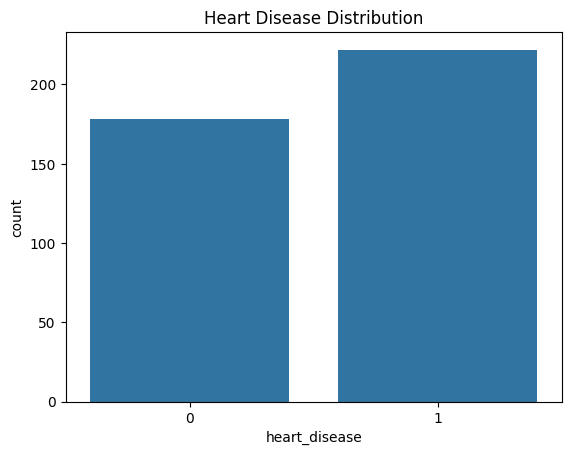

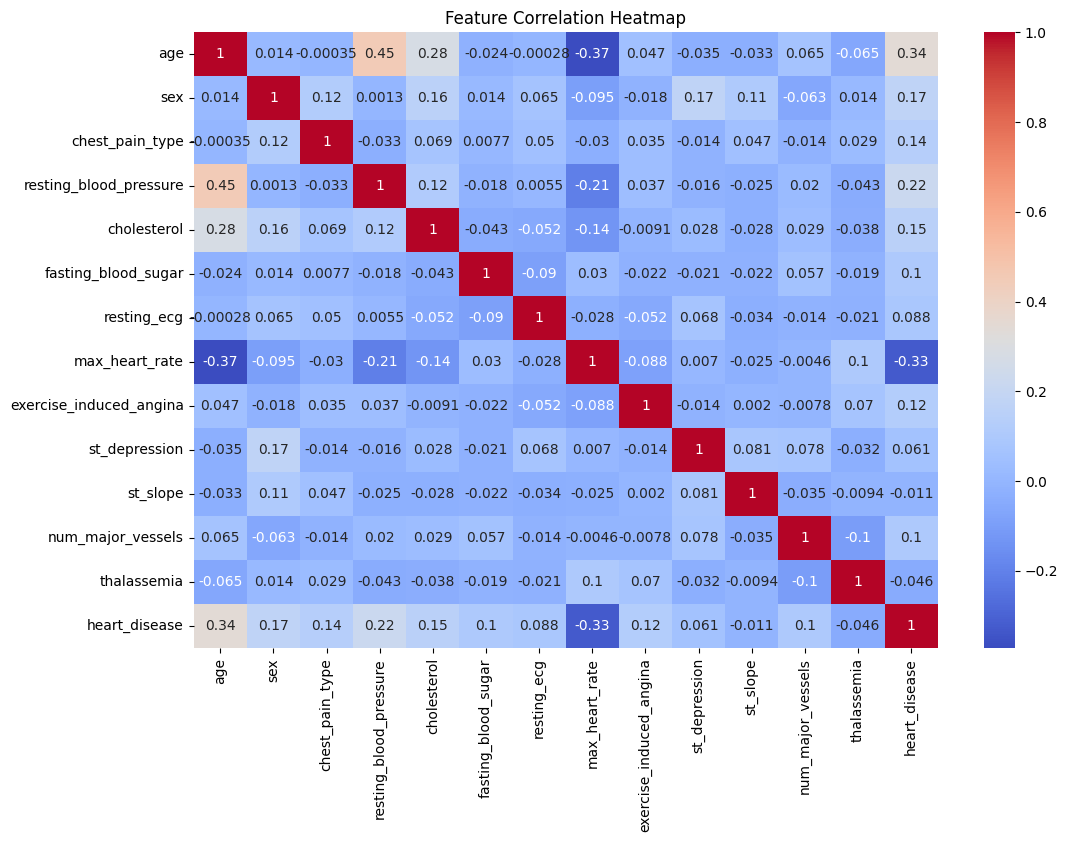

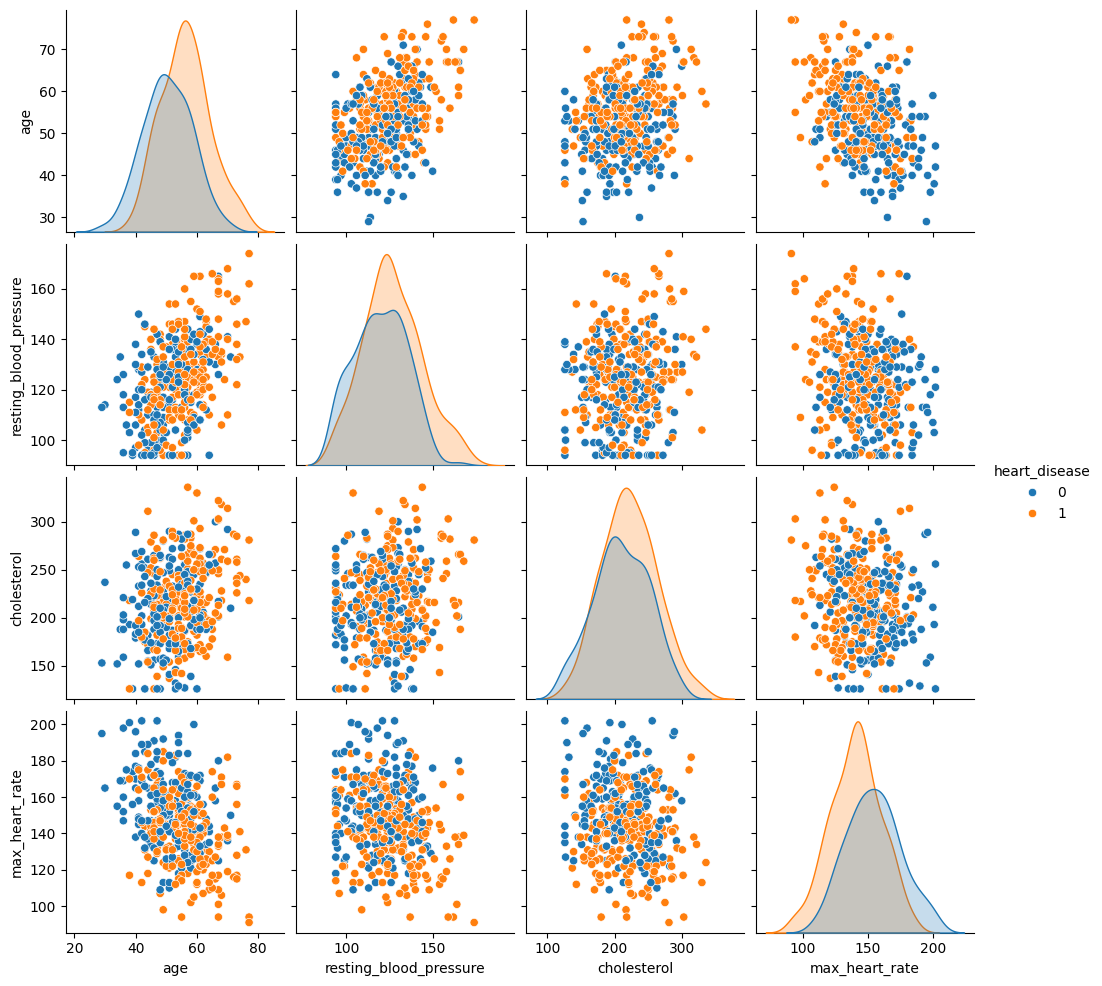

In [45]:
# 3. Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())
print(df['heart_disease'].value_counts())

# Target distribution
sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot for key features
sns.pairplot(df, hue='heart_disease', vars=['age','resting_blood_pressure','cholesterol','max_heart_rate'])
plt.show()


In [46]:
# 4. Data Preparation
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling for SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# 5. Fit scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # <- scaler is fitted here
X_test_scaled = scaler.transform(X_test)         # <- use fitted scaler

# 6. Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved!")

Scaler saved!


In [48]:
import joblib

scaler = joblib.load("scaler.pkl")
print(type(scaler))


<class 'sklearn.preprocessing._data.StandardScaler'>


In [49]:
# 7. Model Training & Saving
models = {
    'decision_tree': DecisionTreeClassifier(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'logistic_regression': LogisticRegression(),
    'svm': SVC(probability=True)
}

results = {}

for name, model in models.items():
    # Scale data for SVM and Logistic Regression
    if name in ['svm', 'logistic_regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
    
    # Save model
    joblib.dump(model, f'{name}_model.pkl')
    print(f"{name} model saved!")

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    print(f"---{name}---")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

print("All models and scaler saved successfully!")

decision_tree model saved!
---decision_tree---
Confusion Matrix:
 [[16 20]
 [14 30]]
              precision    recall  f1-score   support

           0       0.53      0.44      0.48        36
           1       0.60      0.68      0.64        44

    accuracy                           0.57        80
   macro avg       0.57      0.56      0.56        80
weighted avg       0.57      0.57      0.57        80



random_forest model saved!
---random_forest---
Confusion Matrix:
 [[20 16]
 [11 33]]
              precision    recall  f1-score   support

           0       0.65      0.56      0.60        36
           1       0.67      0.75      0.71        44

    accuracy                           0.66        80
   macro avg       0.66      0.65      0.65        80
weighted avg       0.66      0.66      0.66        80



logistic_regression model saved!
---logistic_regression---
Confusion Matrix:
 [[22 14]
 [12 32]]
              precision    recall  f1-score   support

           0       0

Model Comparison:
                      Accuracy  Precision    Recall  F1-Score   ROC-AUC
decision_tree          0.5750   0.600000  0.681818  0.638298  0.563131
random_forest          0.6625   0.673469  0.750000  0.709677  0.760101
logistic_regression    0.6750   0.695652  0.727273  0.711111  0.734217
svm                    0.6500   0.673913  0.704545  0.688889  0.734848


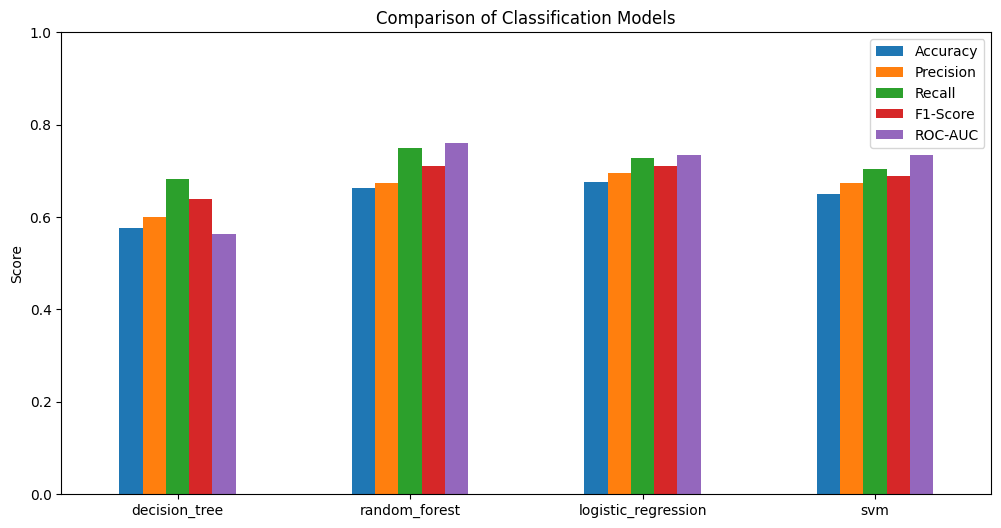

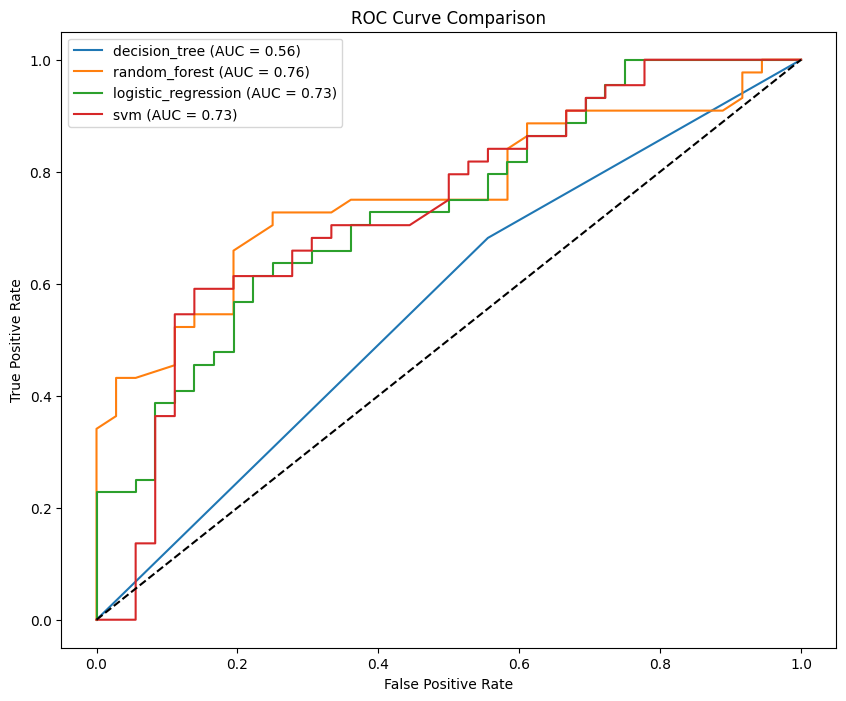

In [50]:
# 8. Model Comparison
results_df = pd.DataFrame(results).T
print("Model Comparison:\n", results_df)

results_df.plot(kind='bar', figsize=(12,6))
plt.title('Comparison of Classification Models')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()

# ROC Curve Comparison
plt.figure(figsize=(10,8))
for name, model in models.items():
    if name in ['svm', 'logistic_regression']:
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    else:
        y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
